In [1]:
import notebookcfa27bdb31 as ArrayGenerator
# import preloader.PreLoader as PreLoader

In [2]:
import preloader


Retrieving notices: ...working... done
- \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / 

In [3]:
!pip install tsai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.3/324.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 62.4 MB/s eta 0:00:00


In [4]:
preloader = preloader.PreLoader('vhr')

In [5]:
ts = preloader.get_3d_ts_array()
labels = preloader.get_labels_array("faults")

In [6]:
del preloader

In [7]:
x,y=ArrayGenerator.generate_dataset_array(dataset_category=2, ts=ts, labels=labels,  split_method='bearing')

{'Faults classified': 'BearingFault, BearingWear, BearingLubrication', 'Channels taken': 'According to label', 'Labels array': 'Binary'}


In [8]:
del ts
del labels

In [9]:
x,y=ArrayGenerator.apply_sliding_window(x, y, window_size=4096, overlap_pct=0.5, with_fft=True)

In [10]:
from  tsai.all import *

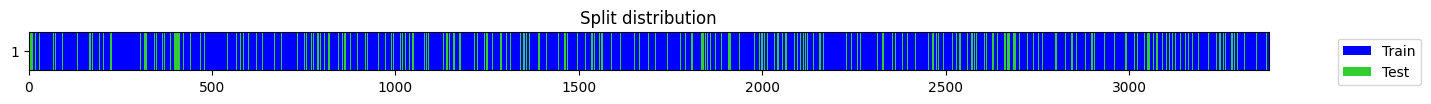

In [11]:
splits = get_splits(
    y , valid_size=0.2, random_state=23, shuffle=True, balance=True
)

In [12]:
tfms = [None, [TSStandardize(by_var=True), Categorize()]]
batch_tfms = [TSStandardize(by_sample=True)]
dls = get_ts_dls(
    x ,
    y ,
    splits=splits,
    tfms=tfms,
    shuffle_train=True,
    batch_tfms=batch_tfms,
    bs=[64, 256],

)

In [13]:
del x
del y

In [14]:
model = InceptionTime(dls.vars, dls.c)
# model = MLP(c_in=1,c_out=2,seq_len=4092  )
learn = Learner(dls, model, metrics=[accuracy, Precision(), Recall(), F1Score()])

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,0.636711,0.600173,0.664201,0.550955,0.667954,0.603839,00:12
1,0.613290,0.645046,0.639053,0.518703,0.803089,0.630303,00:12
2,0.574530,0.596900,0.711538,0.785714,0.339768,0.474394,00:13
3,0.540688,0.513467,0.752959,0.641975,0.803089,0.713551,00:13
4,0.501553,0.738096,0.631657,0.518797,0.532819,0.525714,00:13
5,0.466801,1.166020,0.428994,0.401550,1.000000,0.573009,00:13
6,0.425883,0.463316,0.794379,0.671429,0.907336,0.771757,00:13
7,0.379490,0.415236,0.812130,0.691860,0.918919,0.789386,00:13
8,0.334973,0.396374,0.841716,0.824786,0.745174,0.782961,00:13
9,0.275590,0.406406,0.821006,0.696023,0.945946,0.801964,00:13


,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score
14,0.101865,0.224942,0.909763,0.880769,0.88417,0.882466


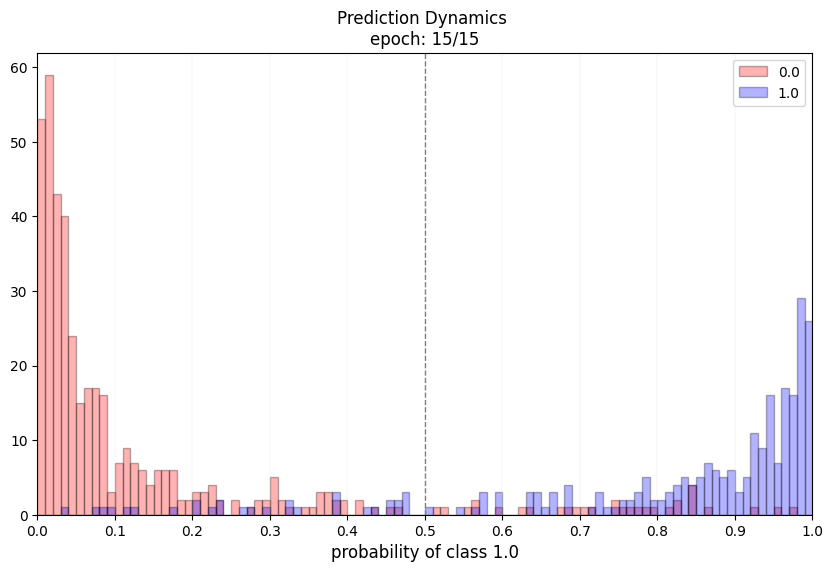

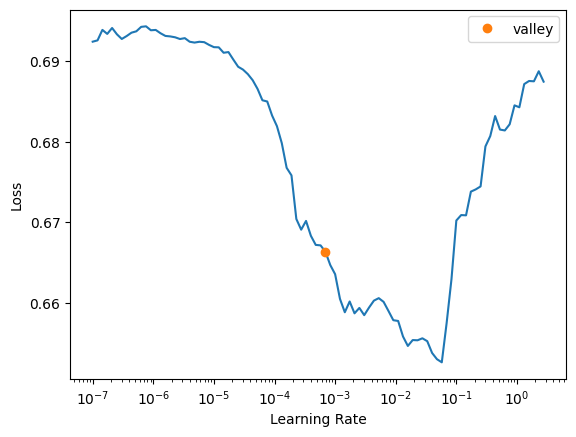

In [15]:
learn.fit_one_cycle(15, lr_max=learn.lr_find(), cbs=[PredictionDynamics()])

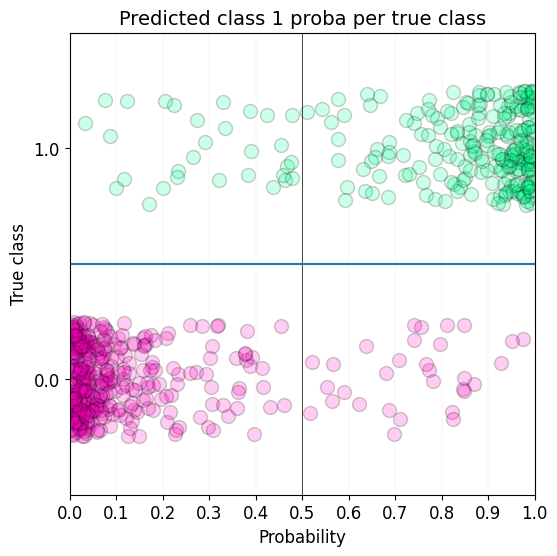

In [16]:
learn.show_probas()

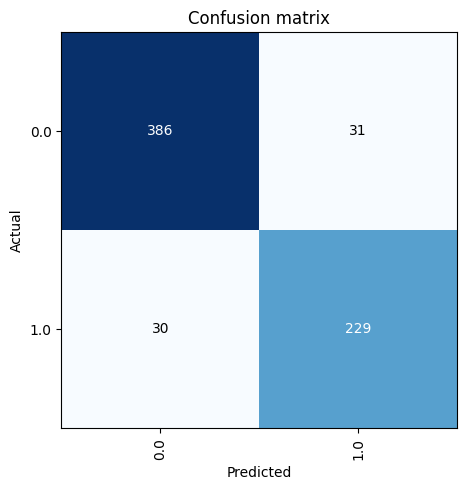

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()